In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load training and test data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Split features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Reshape data to (28, 28, 1) for CNN
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split the data into training and validation sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [2]:
import tensorflow as tf

# Fully Connected Neural Network (FCNN)
fcnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train FCNN
fcnn_history = fcnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)


c:\Users\Rahat Siddique\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5185 - loss: 1.3237 - val_accuracy: 0.8096 - val_loss: 0.5246
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7674 - loss: 0.6578 - val_accuracy: 0.8357 - val_loss: 0.4510
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8009 - loss: 0.5660 - val_accuracy: 0.8448 - val_loss: 0.4200
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8113 - loss: 0.5348 - val_accuracy: 0.8518 - val_loss: 0.4039
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8231 - loss: 0.5088 - val_accuracy: 0.8491 - val_loss: 0.3948
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8277 - loss: 0.4933 - val_accuracy: 0.8554 - val_loss: 0.3888
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8355 - loss: 0.4716 - val_accuracy: 0.8573 - val_loss: 0.3763
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8376 - loss: 0.4614 - val_accuracy: 0.

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Split features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Reshape data to (28, 28, 1) for CNN
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split the data into training and validation sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# FCNN model (already trained)
fcnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fcnn_history = fcnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# CNN Evaluation
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


c:\Users\Rahat Siddique\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5431 - loss: 1.2882 - val_accuracy: 0.8167 - val_loss: 0.5147
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7736 - loss: 0.6406 - val_accuracy: 0.8269 - val_loss: 0.4557
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8016 - loss: 0.5702 - val_accuracy: 0.8426 - val_loss: 0.4185
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8185 - loss: 0.5210 - val_accuracy: 0.8503 - val_loss: 0.4025
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8260 - loss: 0.4992 - val_accuracy: 0.8536 - val_loss: 0.3892
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8363 - loss: 0.4775 - val_accuracy: 0.8597 - val_loss: 0.3803
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8380 - loss: 0.4684 - val_accuracy: 0.8575 - val_loss: 0.3822
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8415 - loss: 0.4534 - val_accuracy: 0.

c:\Users\Rahat Siddique\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.6062 - loss: 1.0715 - val_accuracy: 0.8293 - val_loss: 0.4560
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.8222 - loss: 0.4868 - val_accuracy: 0.8654 - val_loss: 0.3661
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.8543 - loss: 0.4065 - val_accuracy: 0.8739 - val_loss: 0.3336
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.8695 - loss: 0.3584 - val_accuracy: 0.8841 - val_loss: 0.3075
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 66s 74ms/step - accuracy: 0.8820 - loss: 0.3292 - val_accuracy: 0.8977 - val_loss: 0.2807
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8930 - loss: 0.2994 - val_accuracy: 0.8988 - val_loss: 0.2735
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9015 - loss: 0.2715 - val_accuracy: 0.9003 - val_loss: 0.2685
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9030 - loss: 0.2695 -

In [7]:
# FCNN Evaluation
fcnn_loss, fcnn_acc = fcnn_model.evaluate(X_test, y_test)
print(f"FCNN Test Accuracy: {fcnn_acc:.4f}")

# CNN Evaluation
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8686 - loss: 0.3589
FCNN Test Accuracy: 0.8688
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6709 - loss: 0.8568
CNN Test Accuracy: 0.6757


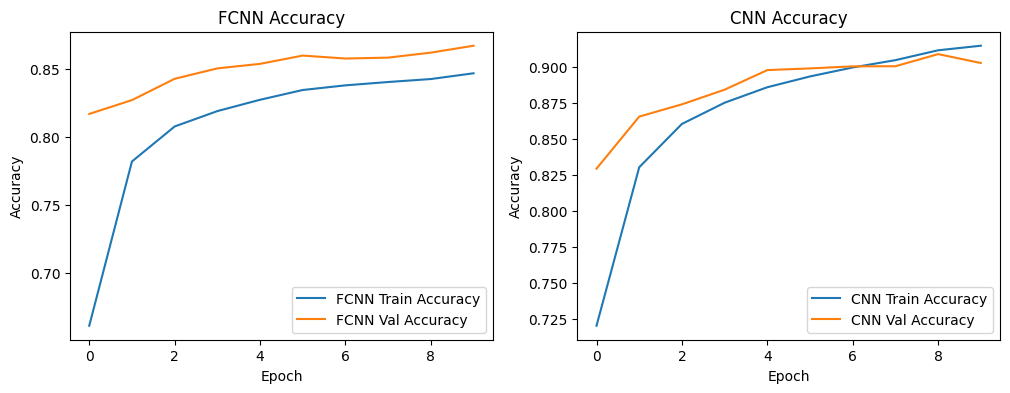

In [8]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy and loss for both models
plt.figure(figsize=(12, 4))

# FCNN Accuracy
plt.subplot(1, 2, 1)
plt.plot(fcnn_history.history['accuracy'], label='FCNN Train Accuracy')
plt.plot(fcnn_history.history['val_accuracy'], label='FCNN Val Accuracy')
plt.title('FCNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train, X_val contain your current dataset of shape (28, 28, 1)
# Convert them to (224, 224, 3)
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])

# Convert grayscale to RGB
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)
X_val_resized = np.repeat(X_val_resized, 3, axis=-1)


NameError: name 'cv2' is not defined

In [17]:
# Example check if X_train and X_val are properly loaded
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


X_train shape: (48000, 28, 28, 1)
X_val shape: (12000, 28, 28, 1)


In [18]:
print("X_train dtype:", X_train.dtype)
print("X_val dtype:", X_val.dtype)


X_train dtype: float32
X_val dtype: float32


In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load the MNIST dataset
mnist_data = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Unpack the data
X, y = mnist_data

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to (28, 28, 1) since CNNs expect input in this format
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# Convert labels to integers
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (56000, 28, 28, 1)
X_val shape: (14000, 28, 28, 1)
y_train shape: (56000,)
y_val shape: (14000,)


In [15]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load a very small subset of MNIST dataset
n_samples = 100  # Use only 100 samples
(X_full, y_full), _ = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X_full = X_full.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)

X_full = X_full[:n_samples]  # Use only n_samples
y_full = y_full[:n_samples]

# Split dataset into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Build a simple CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {accuracy:.4f}")


ValueError: too many values to unpack (expected 2)